(1010,) (1010, 2)


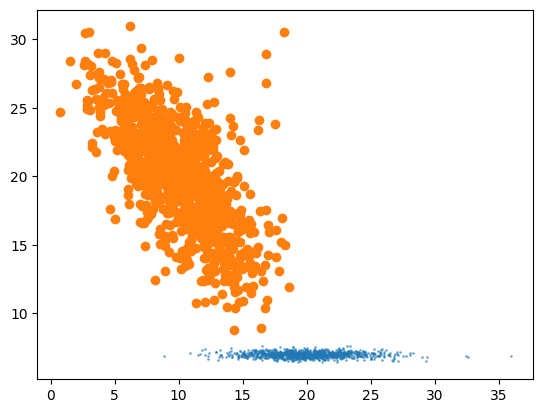

In [9]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
d1 = np.loadtxt("C:/Users/rlaeo/Downloads/Outliers (1)/outlier_1d.txt")
d2 = np.loadtxt("C:/Users/rlaeo/Downloads/Outliers (1)/outlier_2d.txt")
d3 = np.loadtxt("C:/Users/rlaeo/Downloads/Outliers (1)/outlier_curve.txt")
print(d1.shape,d2.shape)

plt.scatter(d1,np.random.normal(7,0.2,size=d1.size), s=1, alpha=0.5)
#  random.normal 함수를 이용해 7을 평균값으로 하고 0.2를 표준편차로 하는 정규분포를 따르는 난수를 생성
plt.scatter(d2[:,0],d2[:,1])
plt.show()


Rejection 5 points
z-score of 3 corresponds to a prob of 0.27%


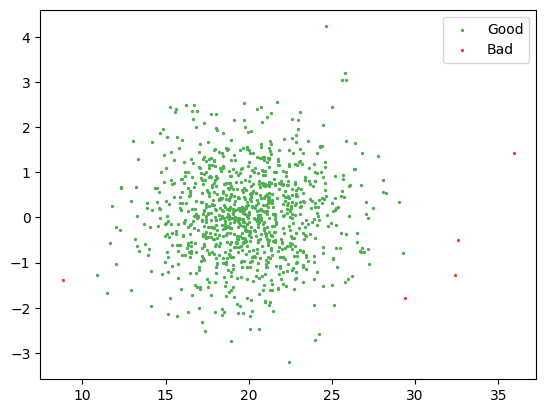

In [3]:
mean, std = np.mean(d1), np.std(d1)
z_score = np.abs((d1-mean)/std)
threshold = 3
good = z_score < threshold
print(f"Rejection {(~good).sum()} points")# ~: 결과값 뒤집기
from scipy.stats import norm
print(f"z-score of 3 corresponds to a prob of {100 * 2 * norm.sf(threshold):0.2f}%")
visual_scatter = np.random.normal(size=d1.size)
plt.scatter(d1[good], visual_scatter[good], s=2, label="Good", color = "#4CAF50")
plt.scatter(d1[~good], visual_scatter[~good], s=2, label='Bad', color = '#F44336')
plt.legend()

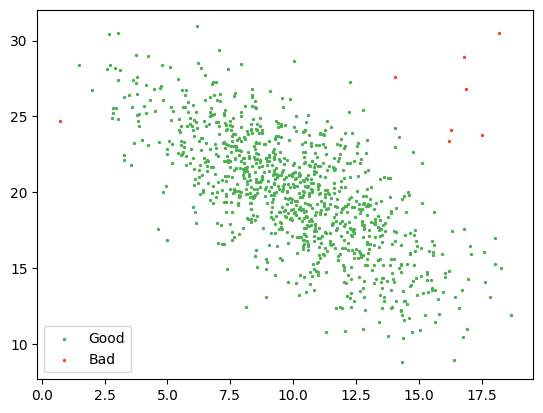

In [4]:
from scipy.stats import multivariate_normal as mn
mean,cov = np.mean(d2,axis=0), np.cov(d2.T)
good = mn(mean,cov).pdf(d2) > 0.01/100

plt.scatter(d2[good,0],d2[good,1],s=2,label= "Good",color="#4CAF50")
plt.scatter(d2[~good,0],d2[~good,1],s=2,label= "Bad",color="#F44336")
plt.legend()

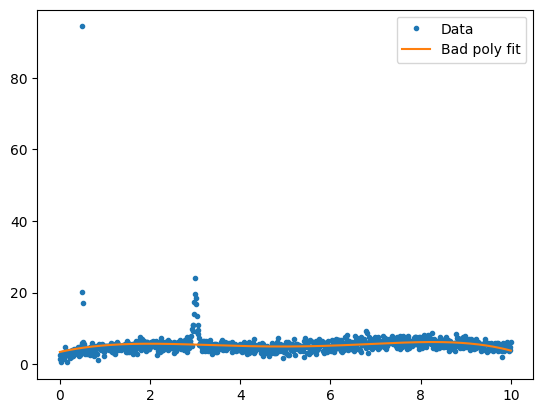

In [11]:
xs,ys = d3.T #T를 붙혀 치환할 수 있도록 만듦
p = np.polyfit(xs,ys,deg=5)  #np.polyfit을 입력해 다항식을 얻음, 5차 다항식이 되도록 deg=5를 입력, 이걸로 x값,x제곱값,x세제곱 등을 구할 수 있음
#y값을 다시 얻고자 하거나 다항식을 표본으로 추출하고자 한다면 np.polyval을 사용
ps = np.polyval(p,xs)#을 입력하고 p,xs를 전달
plt.plot(xs,ys,".",label="Data")
plt.plot(xs,ps,label="Bad poly fit")
plt.legend()
plt.show()


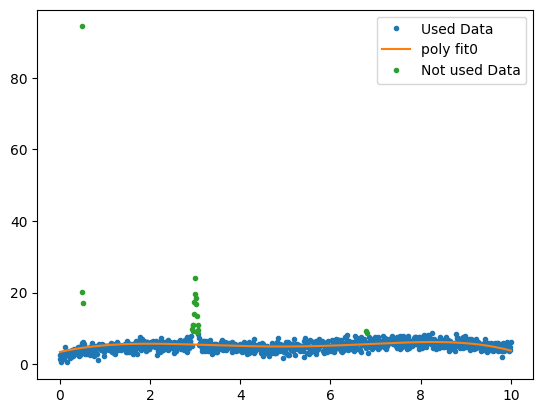

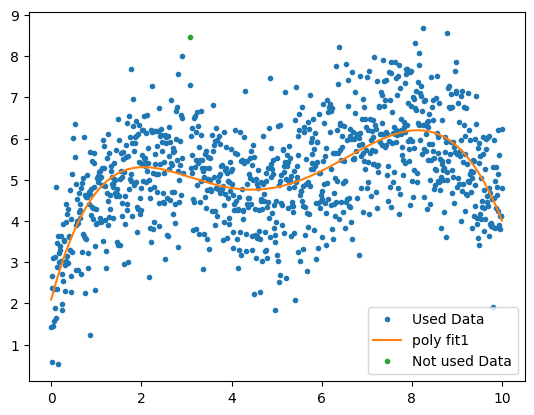

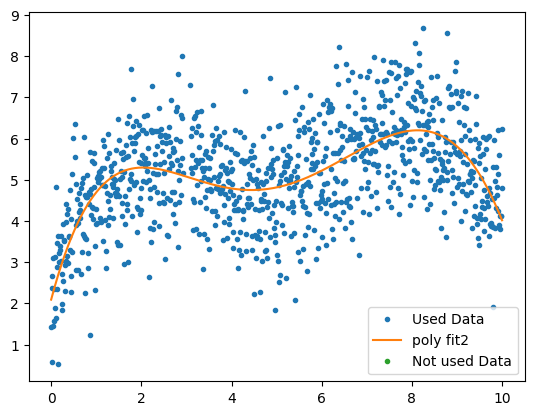

In [16]:
x,y = xs.copy(), ys.copy()
for i in range(5):
    p = np.polyfit(x,y,deg=5)
    ps = np.polyval(p,x)
    good = y - ps < 3 #거리는 3미만, 데이터 물리학에서는 음수가 없기때문에 음수는 가정x

    x_bad, y_bad = x[~good],y[~good]
    x,y = x[good],y[good]

    plt.plot(x,y,".",label = "Used Data")
    plt.plot(x,np.polyval(p,x),label = f"poly fit{i}")
    plt.plot(x_bad,y_bad,".",label="Not used Data")
    plt.legend()
    plt.show()

    if (~good).sum() == 0:
        break

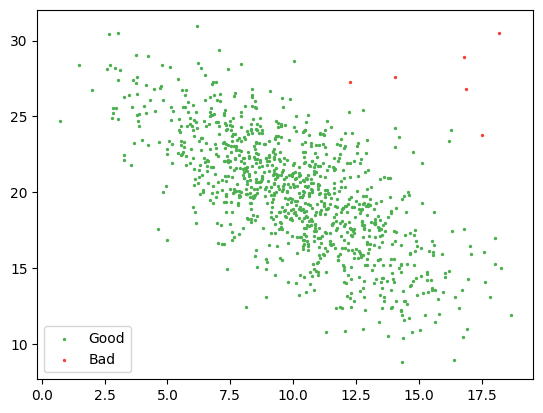

In [17]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = 20, contamination=0.005)
good = lof.fit_predict(d2) == 1
plt.scatter(d2[good,0],d2[good,1],s=2,label= "Good",color="#4CAF50")
plt.scatter(d2[~good,0],d2[~good,1],s=2,label= "Bad",color="#F44336")
plt.legend()